In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from PIL import Image
from IPython.display import display
import math

In [13]:
path = "/workspace/Data/Lena.jpeg" # Your image path 
img = Image.open(path)
kernal=[[0,-1,0],[0,0,0],[0,1,0]]
# kernal=[[1,1,1],[1,1,1],[1,1,1]]

In [14]:
def Threshold(img, threshold):
    width, height=img.size
    newimg = Image.new("RGB", (width, height), "white")
    
    for x in range(0, width):
        for y in range(0, height):
            p = img.getpixel((x-1, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
            if (r + g + b)>=threshold:
                newimg.putpixel((x,y),(255,255,255))
            else:
                newimg.putpixel((x,y),(0,0,0))
    return(newimg)

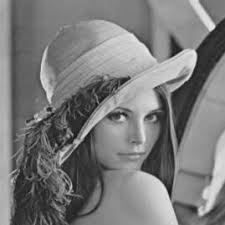

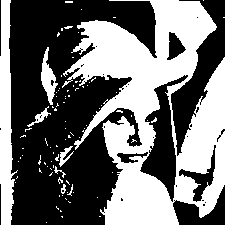

In [15]:
display(img)
Threshold(img, 400)

In [22]:
def ConvolveImgKer(img, kernal):
    width, height=img.size
    newimg = Image.new("RGB", (width-2, height-2), "white")

    for x in range(1, width-2):  # ignore the edge pixels for simplicity (1 to width-1)
        for y in range(1, height-2): # ignore edge pixels for simplicity (1 to height-1)

            Gp=0
            
            p = img.getpixel((x-1, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
    
            
            Gp += (r + g + b)*kernal[0][0]
    
            p = img.getpixel((x-1, y))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[0][1]
    
            p = img.getpixel((x-1, y+1))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[0][2]
    
            p = img.getpixel((x, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[1][0]
                  
            p = img.getpixel((x, y+1))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[1][1]
    
            p = img.getpixel((x+1, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[1][2]
    
            p = img.getpixel((x+1, y))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[2][1]
    
            p = img.getpixel((x+1, y+1))
            r = p[0]
            g = p[1]
            b = p[2]
    
            Gp += (r + g + b)*kernal[2][2]

            # Gp=int(Gp/1)
            
            newimg.putpixel((x,y),(Gp,Gp,Gp))
    print(width, height)
    width1, height1=newimg.size
    print(width1, height1)
    return(newimg)

In [23]:
def padImageSH(img):
    width, height=img.size
    newimg = Image.new("RGB", (width+2, height+2), "black")

    Image.Image.paste(newimg, img, (1, 1))

    # pad up
    newimg.putpixel((0,0),img.getpixel((0, 0)))
    for column_counter in range(0, width):
            current_pixel=img.getpixel((column_counter, 0))
            newimg.putpixel((column_counter+1,0),current_pixel) 
    
    # pad right
    newimg.putpixel((width+1, 0),img.getpixel((width-1, 0)))
    for row_counter in range(0, height):
            current_pixel=img.getpixel((width-1, row_counter))
            newimg.putpixel((width+1,row_counter+1),current_pixel)

    # pad down
    newimg.putpixel((width+1,height+1),img.getpixel((width-1, height-1)))
    for column_counter in range(0, width):
            current_pixel=img.getpixel((column_counter, height-1))
            newimg.putpixel((column_counter+1,height+1),current_pixel)

    # pad left
    newimg.putpixel((0, height+1),img.getpixel((0, height-1)))
    for row_counter in range(0, height):
            current_pixel=img.getpixel((0, row_counter))
            newimg.putpixel((0,row_counter+1),current_pixel)
    width1, height1=newimg.size
    print(width1, height1)
    return newimg

225 225
223 223
225 225
223 223


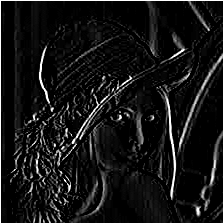

In [24]:
blurred_lena=ConvolveImgKer(img, kernal)
display(ConvolveImgKer(img, kernal))

In [ ]:
display(padImageSH(blurred_lena))